In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()

    return dataset, training_dataset

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [1]:
# A2 Multi - TS LENGTH
dataset_name = 'A2 Yahoo'
dimensions = [100, 200, 300, 400, 500, 600, 700]

In [10]:
# TS LENGTH - RPCA
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
r_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)   

In [11]:
# TS LENGTH - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)    

In [12]:
# TS LENGTH - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)    

In [13]:
# TS LENGTH - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)    

In [14]:
# TS LENGTH - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in ts_lengths:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [15]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.   , 0.86 , 0.   ],
       [0.1  , 0.235, 0.175],
       [0.054, 0.267, 0.286],
       [0.062, 0.148, 0.289],
       [0.07 , 0.128, 0.289],
       [0.071, 0.118, 0.283],
       [0.113, 0.107, 0.348]])}, {'title': 'Histogram', 'scores': array([[0.   , 0.84 , 0.   ],
       [0.011, 0.885, 0.053],
       [0.037, 0.873, 0.127],
       [0.011, 0.865, 0.113],
       [0.01 , 0.878, 0.099],
       [0.015, 0.89 , 0.089],
       [0.003, 0.894, 0.106]])}, {'title': 'Cluster', 'scores': array([[0.   , 0.92 , 0.   ],
       [1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   ],
       [0.947, 0.002, 0.982],
       [0.881, 0.005, 0.951],
       [0.896, 0.004, 0.959]])}, {'title': 'SVM', 'scores': array([[0.   , 0.05 , 0.   ],
       [0.037, 0.18 , 0.143],
       [0.014, 0.23 , 0.207],
       [0.052, 0.148, 0.272],
       [0.045, 0.15 , 0.242],
       [0.045, 0.13 , 0.235],
       [0.052, 0.09 , 0.241]])}, {'title': 'Isolation Forest'

In [3]:
import numpy as np
scores = [{'title': 'RPCA', 'scores': np.array([[0.   , 0.86 , 0.   ],
       [0.1  , 0.235, 0.175],
       [0.054, 0.267, 0.286],
       [0.062, 0.148, 0.289],
       [0.07 , 0.128, 0.289],
       [0.071, 0.118, 0.283],
       [0.113, 0.107, 0.348]])}, {'title': 'Histogram', 'scores': np.array([[0.   , 0.84 , 0.   ],
       [0.011, 0.885, 0.053],
       [0.037, 0.873, 0.127],
       [0.011, 0.865, 0.113],
       [0.01 , 0.878, 0.099],
       [0.015, 0.89 , 0.089],
       [0.003, 0.894, 0.106]])}, {'title': 'Cluster', 'scores': np.array([[0.   , 0.92 , 0.   ],
       [1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   ],
       [0.947, 0.002, 0.982],
       [0.881, 0.005, 0.951],
       [0.896, 0.004, 0.959]])}, {'title': 'SVM', 'scores': np.array([[0.   , 0.05 , 0.   ],
       [0.037, 0.18 , 0.143],
       [0.014, 0.23 , 0.207],
       [0.052, 0.148, 0.272],
       [0.045, 0.15 , 0.242],
       [0.045, 0.13 , 0.235],
       [0.052, 0.09 , 0.241]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.   , 0.48 , 0.   ],
       [0.001, 0.485, 0.04 ],
       [0.002, 0.45 , 0.161],
       [0.014, 0.462, 0.17 ],
       [0.016, 0.494, 0.151],
       [0.016, 0.507, 0.141],
       [0.041, 0.514, 0.163]])}]

In [4]:
#NMI
results = []
for score in scores:
    res = []
    values = score['scores']
    for i in range(len(dimensions)):
        dim = int(dimensions[i]/10)
        val = values[i][0]
        res.append((dim, val))
    results.append({'title' : score['title'], 'plotdata' : res}) 

In [5]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

[   {   'plotdata': [   (10, 0.0),
                        (20, 0.1),
                        (30, 0.054),
                        (40, 0.062),
                        (50, 0.07),
                        (60, 0.071),
                        (70, 0.113)],
        'title': 'RPCA'},
    {   'plotdata': [   (10, 0.0),
                        (20, 0.011),
                        (30, 0.037),
                        (40, 0.011),
                        (50, 0.01),
                        (60, 0.015),
                        (70, 0.003)],
        'title': 'Histogram'},
    {   'plotdata': [   (10, 0.0),
                        (20, 1.0),
                        (30, 1.0),
                        (40, 1.0),
                        (50, 0.947),
                        (60, 0.881),
                        (70, 0.896)],
        'title': 'Cluster'},
    {   'plotdata': [   (10, 0.0),
                        (20, 0.037),
                        (30, 0.014),
                        (40, 0.052),
    

In [6]:
#RMSE
results = []
for score in scores:
    res = []
    values = score['scores']
    for i in range(len(dimensions)):
        dim = int(dimensions[i]/10)
        val = values[i][1]
        res.append((dim, val))
    results.append({'title' : score['title'], 'plotdata' : res}) 

In [7]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

[   {   'plotdata': [   (10, 0.86),
                        (20, 0.235),
                        (30, 0.267),
                        (40, 0.148),
                        (50, 0.128),
                        (60, 0.118),
                        (70, 0.107)],
        'title': 'RPCA'},
    {   'plotdata': [   (10, 0.84),
                        (20, 0.885),
                        (30, 0.873),
                        (40, 0.865),
                        (50, 0.878),
                        (60, 0.89),
                        (70, 0.894)],
        'title': 'Histogram'},
    {   'plotdata': [   (10, 0.92),
                        (20, 0.0),
                        (30, 0.0),
                        (40, 0.0),
                        (50, 0.002),
                        (60, 0.005),
                        (70, 0.004)],
        'title': 'Cluster'},
    {   'plotdata': [   (10, 0.05),
                        (20, 0.18),
                        (30, 0.23),
                        (40, 0.148),

In [8]:
#F1
results = []
for score in scores:
    res = []
    values = score['scores']
    for i in range(len(dimensions)):
        dim = int(dimensions[i]/10)
        val = values[i][2]
        res.append((dim, val))
    results.append({'title' : score['title'], 'plotdata' : res}) 

In [9]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

[   {   'plotdata': [   (10, 0.0),
                        (20, 0.175),
                        (30, 0.286),
                        (40, 0.289),
                        (50, 0.289),
                        (60, 0.283),
                        (70, 0.348)],
        'title': 'RPCA'},
    {   'plotdata': [   (10, 0.0),
                        (20, 0.053),
                        (30, 0.127),
                        (40, 0.113),
                        (50, 0.099),
                        (60, 0.089),
                        (70, 0.106)],
        'title': 'Histogram'},
    {   'plotdata': [   (10, 0.0),
                        (20, 1.0),
                        (30, 1.0),
                        (40, 1.0),
                        (50, 0.982),
                        (60, 0.951),
                        (70, 0.959)],
        'title': 'Cluster'},
    {   'plotdata': [   (10, 0.0),
                        (20, 0.143),
                        (30, 0.207),
                        (40, 0.272),


In [10]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], marker=".", label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [11]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], marker=".", label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [12]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], marker=".", label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

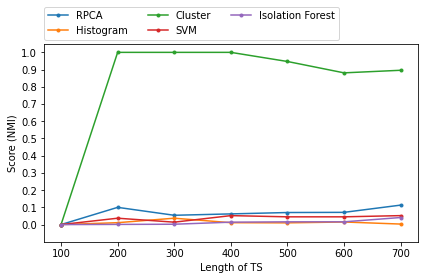

In [13]:
generate_nmi_line_chart(ts_lengths, scores)

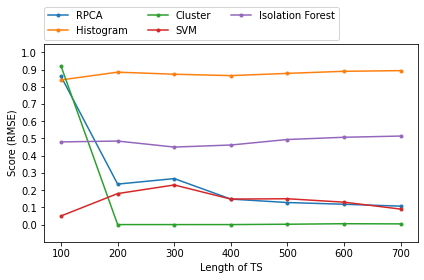

In [14]:
generate_rmse_line_chart(ts_lengths, scores)

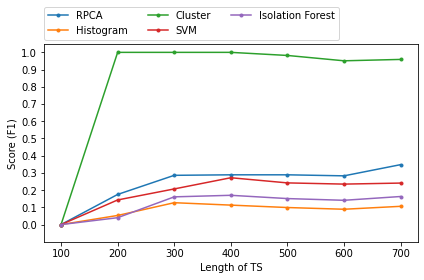

In [15]:
generate_f1_line_chart(ts_lengths, scores)

In [2]:
dimension = np.array([200, 400, 600, 800, 1000])

lisa_pearson_results = np.array([1.42, 1.68, 2.01, 2.37, 2.73])
lisa_dtw_results = np.array([2.35, 3.7, 5.08, 6.37, 7.65])
lisa_spatial_results = np.array([1.54, 1.86, 2.21, 2.52, 2.88])

rpca_results = np.array([2.43, 2.5, 2.67, 2.64, 2.75])
histogram_results = np.array([2.35, 2.39, 2.48, 2.56, 2.7])
cluster_results = np.array([2.44, 2.48, 2.48, 2.66, 2.7])
svm_results = np.array([2.25, 2.34, 2.45, 2.48, 2.64])
isolation_results = np.array([2.65, 2.71, 2.79, 2.86, 2.94])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [5]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

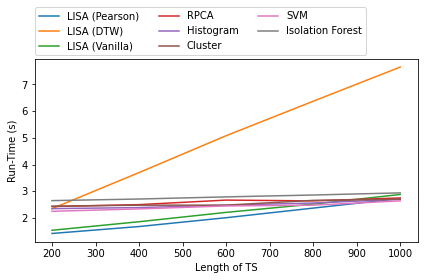

In [6]:
#PLOT
generate_timeit_line_chart(dimension, scores)
